In [1]:
import numpy as np
import pandas as pd

In [4]:
#Reading the File using a different encoding option.We have used 'latin-1' encoder here.

try:
    data = pd.read_csv('spam.csv', encoding='latin-1')
    print(data.head())
except UnicodeDecodeError as e:
    print(f"Error reading file with 'latin-1' encoding: {e}")



     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:

data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
120,spam,URGENT! Your Mobile No. was awarded å£2000 Bon...,NaN,NaN,NaN
4629,ham,Everybody had fun this evening. Miss you.,NaN,NaN,NaN
2251,ham,hope things went well at 'doctors' ;) reminds ...,NaN,NaN,NaN
1764,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...,NaN,NaN,NaN
493,ham,What class of &lt;#&gt; reunion?,NaN,NaN,NaN


In [7]:

data.shape

(5572, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
data.sample(5)

,v1,v2
2135,ham,"Carlos took a while (again), we leave in a minute"
5361,ham,Yep get with the program. You're slacking.
4490,ham,"My friend, she's studying at warwick, we've pl..."
3480,ham,Wherre's my boytoy ? :-(
5258,ham,1 in cbe. 2 in chennai.


In [12]:
# renaming the columns
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
919,ham,Dont talk to him ever ok its my word.
2051,ham,Hey darlin.. i can pick u up at college if u t...
487,ham,Dear reached railway. What happen to you
3799,spam,We tried to contact you re your reply to our o...
3248,ham,"Sorry, I can't help you on this."


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
data['target'] = encoder.fit_transform(data['target'])

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicate values
data.duplicated().sum()

403

In [21]:
data=data.drop_duplicates(keep='first')

In [22]:
data.duplicated().sum()

0

In [23]:
data.shape

(5169, 2)

In [24]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

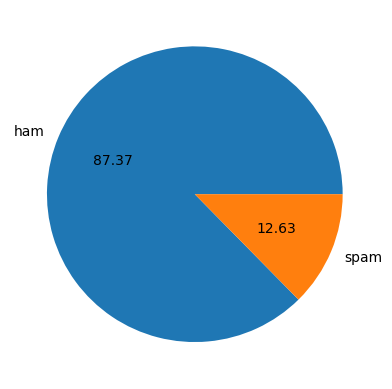

In [26]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
import nltk

In [28]:
!pip install nltk

In [29]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pradnya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
data['num_characters'] = data['text'].apply(len)

In [31]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# num of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
data[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
#spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [45]:
import string
from nltk.corpus import stopwords
import nltk

# Ensure you have downloaded the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradnya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [48]:
data['transformed_text'] = data['text'].apply(transform_text)

In [49]:

data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
!pip install wordcloud

     ------------------------------------ 300.6/300.6 kB 844.0 kB/s eta 0:00:00


In [57]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [58]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

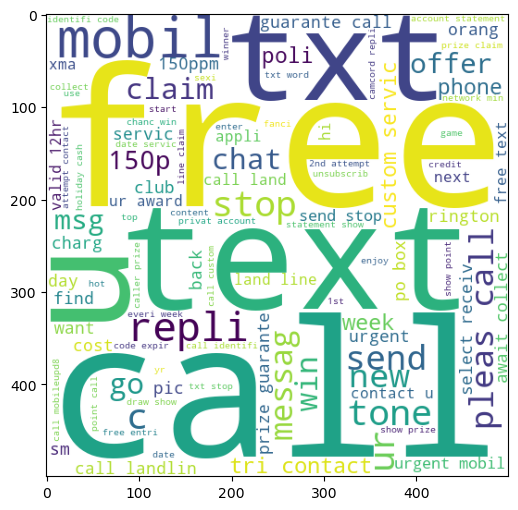

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(data['transformed_text']).toarray()


In [63]:

X.shape

(5169, 3000)

In [65]:

y = data['target'].values

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression


In [72]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Output the trained model, predicted values, and evaluation metrics
print("\nTrained Logistic Regression Model:")
print(model)
print("Predicted values (y_pred):")
print(y_pred)
print("Actual values (y_test):")
print(y_test)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       896
           1       0.98      0.69      0.81       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Confusion Matrix:
[[894   2]
 [ 43  95]]

Trained Logistic Regression Model:
LogisticRegression()
Predicted values (y_pred):
[0 0 0 ... 0 0 0]
Actual values (y_test):
[0 0 0 ... 0 0 0]


In [73]:
# Predict target for a specific new text
new_text = ["Yep get with the program. You're slacking."]
new_text_transformed = tfidf.transform(new_text).toarray()
predicted_target = model.predict(new_text_transformed)

print(f"\nNew Text: {new_text[0]}")
print(f"Predicted Target: {predicted_target[0]}")


New Text: Yep get with the program. You're slacking.
Predicted Target: 0
